In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
import numpy as np
import pandas
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
import data_prep
import ngram
import linguistic_feature

In [7]:
df = data_prep.import_chi_review()
print(len(df))
display(df[:5])

1600


,Label,Rating,Ori_Review
0,1,1,Affinia Chicago is one of the worst hotels I h...
1,1,1,I recently stayed at the Affina Chicago hotel ...
2,1,1,I stayed at the Affina Chicago for my annivers...
3,1,1,If you are looking for a high end hotel on the...
4,1,1,I just returned from a long weekend in Chicago...


In [8]:
df = data_prep.preprocess_ngram(df)
df = data_prep.preprocess_ling_feature(df)
df = linguistic_feature.ling_feature(df)
df.head()

,Label,Rating,Ori_Review,Clean_Review,PP_Review,Word_List,Word_List_all,num_word,num_coreword,num_stopword,num_char,char_per_word,num_first_sing,num_first_pru,num_third
0,1,1,Affinia Chicago is one of the worst hotels I h...,affinia chicago be one of the bad hotel i have...,affinia one bad ever life treat poorly guest f...,"[affinia, one, bad, ever, life, treat, poorly,...","[affinia, chicago, be, one, of, the, bad, hote...",166,56,110,845,5.090361,15,0,2
1,1,1,I recently stayed at the Affina Chicago hotel ...,i recently stay at the affina chicago hotel an...,recently affina really dissappointed arrive de...,"[recently, affina, really, dissappointed, arri...","[i, recently, stay, at, the, affina, chicago, ...",224,94,130,1168,5.214286,19,0,1
2,1,1,I stayed at the Affina Chicago for my annivers...,i stay at the affina chicago for my anniversar...,affina anniversary great location make poor cu...,"[affina, anniversary, great, location, make, p...","[i, stay, at, the, affina, chicago, for, my, a...",69,29,40,373,5.405797,4,0,0
3,1,1,If you are looking for a high end hotel on the...,if you be look for a high end hotel on the mag...,look high end magnificent mile affinia best op...,"[look, high, end, magnificent, mile, affinia, ...","[if, you, be, look, for, a, high, end, hotel, ...",146,55,91,768,5.260274,0,0,1
4,1,1,I just returned from a long weekend in Chicago...,i just return from a long weekend in chicago w...,return long weekend wife affinia cannot even b...,"[return, long, weekend, wife, affinia, cannot,...","[i, just, return, from, a, long, weekend, in, ...",253,101,152,1278,5.051383,9,15,0


## Sample Reviews

#### Deceptive

In [33]:
for txt in df[df['Label'] == 1]['Ori_Review'].sample(3):
    print(txt)
    print()

The Omni Chicago Hotel offers all the great amenities in comfort that is expected of a luxury hotel, particularly speedy and easy wireless internet access and nice-sized plasma tv's. The windows are big enough to give a spectacular view of the city skyline while reclining on a great sofa in a comfortable and luxurious living room, before sleeping in a king-sized bed of either feather or foam pillows, which is particularly relaxing after taking a bath or shower in the spacious bathroom. An in-room massage appointment will add an additional relaxing aspect to the stay. There's even an exercise kit within the room for extra convince. However, the vast fitness center is just as worthy to use, as well as the whirlpool, Jacuzzi and the indoor swimming pool. Sunbathing is an easy activity to achieve via the two rooftop sundecks. A nice aspect that isn't so common to find is the ability to have small pets stay with you in the hotel. The Omni Chicago is a great way to add a bit of luxury to any

#### Truthful

In [48]:
for txt in df[df['Label'] == -1]['Ori_Review'].sample(3):
    print(txt)
    print()

My husband and I had a wonderful stay at the Omni Chicago Hotel. I had contacted the customer service representative prior to our stay to request a quiet suite. When we arrived, she greeted us and confirmed that we were getting exactly what I had requested--and more. Our suite had a partial view of the lake!!! And, we were able to check in early. The service at this hotel is incredible. Everyone made us feel welcome and took care to respond to any question or request that we had. The suite was very quiet even though we were on the east side of the hotel, very near to Michigan Avenue. Housekeeping was prompt and thorough. We really couldn't have asked for a better hotel. We will definitely stay there on future trips to Chicago and will recommend this hotel to anyone who travels there.

We brought our giant rottweiler and she had a great time. Small rooms, but this is normal for the chicago hotel scene. Lots of interesting amenities in the room. Convenient to theatres and downtown restau

## Explore Data Distribution

#### Review length distribution (by charactors and words)

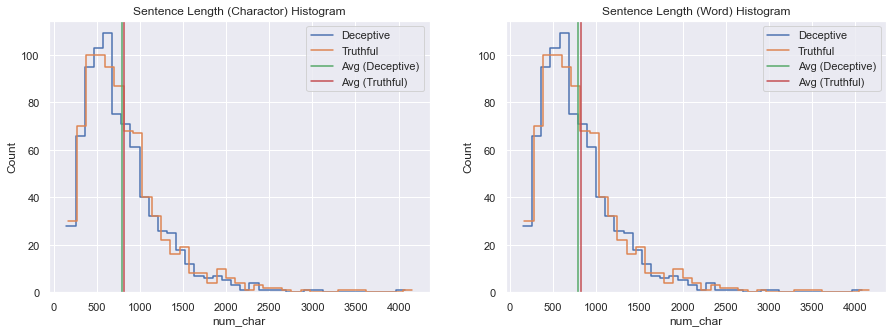

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_char_dec = df[df['Label'] == 1]['num_char']
num_char_tru = df[df['Label'] == -1]['num_char']
num_word_dec = df[df['Label'] == 1]['num_char']
num_word_tru = df[df['Label'] == -1]['num_char']

sns.histplot(num_char_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_char_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_char_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_char_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('Sentence Length (Charactor) Histogram')
ax1.legend()

sns.histplot(num_word_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_word_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_word_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_word_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('Sentence Length (Word) Histogram')
ax2.legend()

plt.show()

#### Core word and stop word distribution

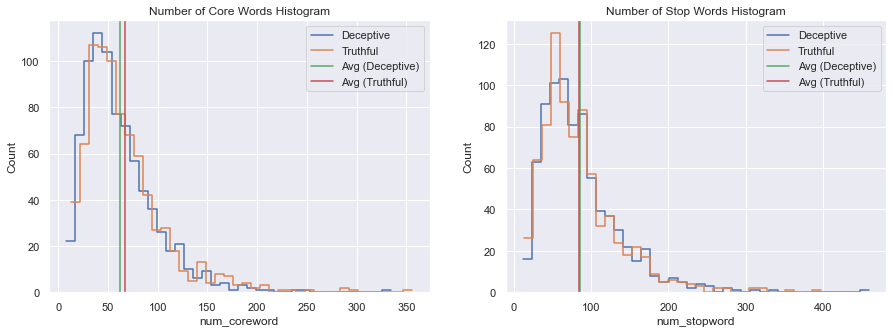

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_core_dec = df[df['Label'] == 1]['num_coreword']
num_core_tru = df[df['Label'] == -1]['num_coreword']
num_stop_dec = df[df['Label'] == 1]['num_stopword']
num_stop_tru = df[df['Label'] == -1]['num_stopword']

sns.histplot(num_core_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_core_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_core_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_core_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('Number of Core Words Histogram')
ax1.legend()

sns.histplot(num_stop_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_stop_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_stop_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_stop_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('Number of Stop Words Histogram')
ax2.legend()

plt.show()

#### Pronoun Distribution

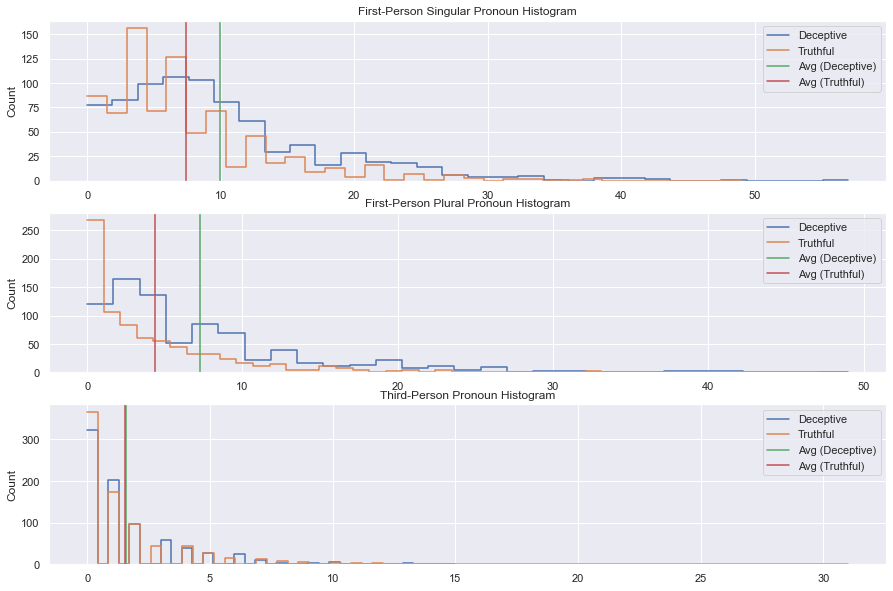

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_figheight(10)
fig.set_figwidth(15)

num_fs_dec = df[df['Label'] == 1]['num_first_sing']
num_fs_tru = df[df['Label'] == -1]['num_first_sing']
num_fp_dec = df[df['Label'] == 1]['num_first_pru']
num_fp_tru = df[df['Label'] == -1]['num_first_pru']
num_third_dec = df[df['Label'] == 1]['num_third']
num_third_tru = df[df['Label'] == -1]['num_third']

sns.histplot(num_f_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_f_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_f_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_f_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('First-Person Singular Pronoun Histogram')
ax1.set(xlabel='')
ax1.legend()

sns.histplot(num_fs_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_fs_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_fs_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_fs_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('First-Person Plural Pronoun Histogram')
ax2.set(xlabel='')
ax2.legend()

sns.histplot(num_third_dec, ax=ax3, element="step", fill=False, label='Deceptive')
sns.histplot(num_third_tru, ax=ax3, element="step", fill=False, label='Truthful')
ax3.axvline(x=num_third_dec.mean(), label='Avg (Deceptive)', c='g')
ax3.axvline(x=num_third_tru.mean(), label='Avg (Truthful)', c='r')
ax3.set_title('Third-Person Pronoun Histogram')
ax3.set(xlabel='')
ax3.legend()

plt.show()